# Cyber Threat Detection Using Machine Learning

You will import the dataset that consists of multiple cyber threat traces and apply Machine Learning techniques to detect cyber threats: 

* Unsupervised Learning: **Kernel Principal Componenet Analysis (PCA)**
* Supervised Learning: 1) **k-Nearest Neighbor (kNN)** and 2) **Deep Neural Network (DNN)**

The organization of this project is as follows:
- Section 1: Packages
- Section 2: Data Preparation
- Section 3: Unsupervised Learning - Kernel PCA
- Section 4: Supervised Learning I - kNN
- Section 5: Supervised Learning II - DNN

Let's get started.

## 1 - Packages

Let's first import the packages that you will need for this project. 
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a library to plot graphs in Python.
- [csv](https://docs.python.org/3/library/csv.html) is the most common import and export format for spreadsheets and databases.
- [pickle](https://docs.python.org/3/library/pickle.html) implements binary protocols for serializing and de-serializing a Python object structure.

Some useful iPython Notebook keyboard shortcuts:
- `Shift-Enter`: run cell (and move to the next cell)
- `Ctrl-Enter`: run cell in-place
- `Alt-Enter`: run cell and insert a new cell below

More tricks are summarized here:
- http://johnlaudun.org/20131228-ipython-notebook-keyboard-shortcuts/
- https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import csv
import pickle
%matplotlib inline

## 2 - Data Preparation

We have already preprocessed the log file and store the processed data in a pickle file. You just need to import the dataset from the pickle file.


We consider five different cyber attacks: 
1. NFS attack
2. Trojan attack
3. Apache attack
4. UDP DDoS attack
5. HTTP DDoS attack

Hence, we can define a `dictionary` called `data_labels` that includes six different labels.

In [2]:
data_labels = {'normal': 0, 
               'nfs': 1,
               'trojan': 2,
               'apache': 3,
               'ddos-UDP': 4,
               'ddos-http': 5
              }

In [3]:
print('There are a total of {} different classes:'.format(len(data_labels)))

for label in data_labels:
    print("  Class {}: {}".format(data_labels[label], label))

There are a total of 6 different classes:
  Class 0: normal
  Class 4: ddos-UDP
  Class 3: apache
  Class 1: nfs
  Class 2: trojan
  Class 5: ddos-http


For example, you want to know the class ID for 'apache' attack. Type the following:

In [4]:
data_labels['apache']

3

### 2.1 - Import dataset

Next, we are going to open the provided pickle file and load the dataset.

In [5]:
with open('./DATA/converted_data.pickle', 'rb') as file:
    imported_data = pickle.load(file)

### 2.2 - Explore the dataset

The object `imported_data` is a dictionary that stores datasets with different labels in the `(key, value)` format, where the `key` is the label and the `value` is the corresponding dataset. So let's check the keys in `imported_data`.

In [6]:
print(imported_data.keys())

dict_keys(['normal', 'ddos-UDP', 'dynamic-hulk', 'apache', 'nfs', 'static-hulk', 'trojan', 'ddos-http'])


In this project, we focus on nfs, trojan, apache, DDoS-UDP, and DDoS-HTTp attacks, and ignore the dynamic-hulk and static-hulk attacks (they are variants of DDoS attacks).
* To retrieve the dataset with labal `normal`, use `imported_data['normal']`.
* The dataset for each label is 3D list.
* To access the `(i,j,k)`-th entry, type `imported_data['normal'][i][j][k]`

In [7]:
# Print the value in the 10-th row and 1st col
print(imported_data['normal'][10][1][0])

0.006100597609561753


Let us print the dimension of all datasets.

In [8]:
for label in data_labels:
    num_examples = len(imported_data[label])    # number of rows
    num_features = len(imported_data[label][0]) # number of columns
    print("imported_data['{}']: ({}, {}, {})".format(label, num_examples, num_features, len(imported_data['normal'][0][0])))

imported_data['normal']: (500, 33292, 1)
imported_data['ddos-UDP']: (100, 33292, 1)
imported_data['apache']: (200, 33292, 1)
imported_data['nfs']: (200, 33292, 1)
imported_data['trojan']: (200, 33292, 1)
imported_data['ddos-http']: (100, 33292, 1)


### 2.3 - Convert 3D list to 2D numpy array

Let us first convert the list to numpy array and print its dimensions.

In [9]:
for label in data_labels:
    imported_data[label] = np.array(imported_data[label], dtype=float) # Convert the list to a numpy array of type float
    print(imported_data[label].shape)

(500, 33292, 1)
(100, 33292, 1)
(200, 33292, 1)
(200, 33292, 1)
(200, 33292, 1)
(100, 33292, 1)


Now, each dataset is a numpy array. You may access the `(i,j,k)`-th entry as follows.

In [10]:
print("For the 10-th example of the 'normal' data, its 20-th feature is")
print(imported_data['normal'][10, 20, 0])

print("\nFor the 20-th example of the 'apache' data, print 0-st through 9-th features.")
print(imported_data['apache'][20, 0:10, 0])

For the 10-th example of the 'normal' data, its 20-th feature is
0.0

For the 20-th example of the 'apache' data, print 0-st through 9-th features.
[0.00737463 0.00460914 0.         0.         0.         0.
 0.         0.00184366 0.         0.        ]


While each dataset is a 3-D array, the third dimension is only 1, which means that we can convert this 3-D array to a 2-D array without lossing any information.

**Task 1: Reshape the 3-D array to a 2-D array.**

Hints:
1. Use the built-in `reshape` method for numpy arrays ([reference](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.reshape.html)).
2. Alternatively, you may use the `np.squeeze` to remove single-dimensional entries from the shape of an array ([reference](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.squeeze.html)).

Expected output:
- `normal: (500, 33292)`
- `nfs: (200, 33292)`
- `trojan: (200, 33292)`
- `apache: (200, 33292)`
- `ddos-UDP: (100, 33292)`
- `ddos-http: (100, 33292)`

In [11]:
data = dict()
for label in data_labels:
    
    #################################################################
    ###### Start code here ######
    data[label] = np.reshape(imported_data[label], (len(imported_data[label]), len(imported_data[label][0])))
    ###### End code here ######
    #################################################################
    
    print('{}: {}'.format(label, data[label].shape))

normal: (500, 33292)
ddos-UDP: (100, 33292)
apache: (200, 33292)
nfs: (200, 33292)
trojan: (200, 33292)
ddos-http: (100, 33292)


In [12]:
# This code checks if you have correctly implemented Task 1.
# You will not see AssertionError if you implement it corretly.
for label in data_labels:
    assert(imported_data[label].shape[0] == data[label].shape[0])
    assert(imported_data[label].shape[1] == data[label].shape[1])

### 2.4 - Divide the dataset into training, validation, and testing datasets.

In Machine Learning, we will usually divide a dataset into training, validation, and testing subsets.
* **Training set** is used to train a ML model or classifier.
* **Validation set** is used to validate and improve the trained model.
* **Testing set** is used to evaluate the performance of the trained model.

We will use **60%** of the samples for training, **20%** for validation, and the remaining **20%** for testing.

In [13]:
# We define the ratios for training, validation, and testing sets
training_ratio = 0.6
validation_ratio = 0.2
testing_ratio = 0.2

# We store the size of training set for different datasets
train_size = dict()
for label in data_labels:
    train_size[label] = int(data[label].shape[0] * training_ratio)
    
# We store the size of testing set for different datasets
test_size = dict()
for label in data_labels:
    test_size[label] = int(data[label].shape[0] * testing_ratio)

#### Step 1: Prepare the training set.

In [14]:
train_x = np.array([], dtype=float).reshape(0, 33292)  # num_features = 33292
train_y = np.array([], dtype=float).reshape(0, 1)

for label in data_labels:
    class_ID = data_labels[label]  # Get the class ID for the given label
    
    total_num = data[label].shape[0]  # Count the total number of examples
    training_num = int(total_num * training_ratio) # Compute the number of training examples
    
    start_idx = 0 # Start index of the training set
    end_idx = start_idx + training_num # End index of the training set
    
    training_data = data[label][start_idx:end_idx, :] # Obtain the training data
    training_labels = np.ones((training_num, 1)) * class_ID # Create labels for the training data
    
    # Concatenate the training samples and labels for each dataset
    train_x = np.concatenate((train_x, training_data))
    train_y = np.concatenate((train_y, training_labels))
    
    print('Training set: {} examples for Class {} ({})'.format(training_num, class_ID, label))
    
print('Total number of training examples: {}'.format(train_x.shape[0]))

Training set: 300 examples for Class 0 (normal)
Training set: 60 examples for Class 4 (ddos-UDP)
Training set: 120 examples for Class 3 (apache)
Training set: 120 examples for Class 1 (nfs)
Training set: 120 examples for Class 2 (trojan)
Training set: 60 examples for Class 5 (ddos-http)
Total number of training examples: 780


In [15]:
# Check the size of the training set
assert(train_x.shape == (780, 33292))
assert(train_y.shape == (780, 1))

#### Step 2: Prepare the validation set.

**TASK 2.1: Take the next 20% samples of each dataset and concatenate them to construct the validation set.**

In [16]:
vali_x = np.array([], dtype=float).reshape(0, 33292)  # num_features = 33292
vali_y = np.array([], dtype=float).reshape(0, 1)

for label in data_labels:
    class_ID = data_labels[label]
    
    #################################################################
    ##### Start code here #####
    total_num = data[label].shape[0]  # Count the total number of examples
    
    validation_num = int(total_num * validation_ratio) # Compute the number of validation examples
    
    start_idx = int(total_num * training_ratio + 1) # Start index of the validation set
    end_idx = start_idx + validation_num # End index of the validation set
    
    validation_data = data[label][start_idx:end_idx, :] # Obtain the validation data
    validation_labels = np.ones((validation_num, 1)) * class_ID # Create labels for the validation data
    
    # Concatenate the validation samples and labels for each dataset
    vali_x = np.concatenate((vali_x, validation_data))
    vali_y = np.concatenate((vali_y, validation_labels))
    ##### End code here #####
    #################################################################
    
    print('Validation set: {} examples for Class {} ({})'.format(validation_num, class_ID, label))

print('Total number of validation examples: {}'.format(vali_x.shape[0]))

Validation set: 100 examples for Class 0 (normal)
Validation set: 20 examples for Class 4 (ddos-UDP)
Validation set: 40 examples for Class 3 (apache)
Validation set: 40 examples for Class 1 (nfs)
Validation set: 40 examples for Class 2 (trojan)
Validation set: 20 examples for Class 5 (ddos-http)
Total number of validation examples: 260


In [17]:
# Check the size of the training set
assert(vali_x.shape == (260, 33292))
assert(vali_y.shape == (260, 1))

#### Step 3: Prepare the testing set.

**TASK 2.2: Take the last 20% samples of each dataset and concatenate them to construct the testing set.**

In [18]:
test_x = np.array([], dtype=float).reshape(0, 33292)  # num_features = 33292
test_y = np.array([], dtype=float).reshape(0, 1)

for label in data_labels:
    class_ID = data_labels[label]
    
    #################################################################
    ###### Start code here ######
    total_num = data[label].shape[0]  # Count the total number of examples
    
    test_num = int(total_num * testing_ratio) # Compute the number of test examples
    
    start_idx = int(total_num - test_num) # Start index of the test set
    end_idx = start_idx + test_num # End index of the test set
    
    test_data = data[label][start_idx:end_idx, :] # Obtain the test data
    test_labels = np.ones((test_num, 1)) * class_ID # Create labels for the test data
    
    # Concatenate the test samples and labels for each dataset
    test_x = np.concatenate((test_x, test_data))
    test_y = np.concatenate((test_y, test_labels))    
    ###### End code here ######
    #################################################################
    
    print('Testing set: {} examples for Class {} ({})'.format(test_num, class_ID, label))

print('Total number of testing examples: {}'.format(test_x.shape[0]))

Testing set: 100 examples for Class 0 (normal)
Testing set: 20 examples for Class 4 (ddos-UDP)
Testing set: 40 examples for Class 3 (apache)
Testing set: 40 examples for Class 1 (nfs)
Testing set: 40 examples for Class 2 (trojan)
Testing set: 20 examples for Class 5 (ddos-http)
Total number of testing examples: 260


In [19]:
# Check the size of the testing set
assert(test_x.shape == (260, 33292))
assert(test_y.shape == (260, 1))

## 3 - Unsupervised Learning - Kernal PCA

In Machine Learning, unsupervised learning requires an algorithm to infer a function that describesthe structure of unlabeled data, which means data that has not been categorized. We will try tobuild a model to distinguish benign graphs from abnormal graphs that is built from a set of rawunlabeled graphs by grouping graphs based on certain similarity automatically. To achieve this, a common way is to try to extract the key features of the data, which means that we need to lowerthe dimension of the original graph data. 

[KernelPCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html): Non-linear dimensionality reduction through the use of kernels. A list of frequently used arguments are summarized as follows. 
- `n_components` : *int, default=None*. Number of components. If None, all non-zero components are kept.
- `kernel`: *“linear” | “poly” | “rbf” (Radial Basis Function) | “sigmoid” | “cosine” | “precomputed”*. Kernel. Default=”linear”.
- `gamma`: *float, default=1/n_features*. Kernel coefficient for rbf, poly and sigmoid kernels. Ignored by other kernels.
- `fit_inverse_transform`: *bool, default=False*. Learn the inverse transform for non-precomputed kernels. (i.e. learn to find the pre-image of a point)



### 3.1 - Packages

- [sklearn](https://scikit-learn.org/stable/): scikit-learn is a widely used Python package for Machine Learning.

In [20]:
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA, KernelPCA
import copy

### 3.2 - Perform Kernel PCA with 3 Principal Components

**TASK 3: Apply Kernel PCA on the training dataset with three principal components (`n_components=3`), radial basis function kernel (`kernel="rbf"`), `fix_inverse_transform=True`, and `gamma=10`.**
- Instead of applying the KernelPCA transformer to `train_x`, apply it on `train_x_copy`. 
- Name the projected low-dimensional training set as `train_x_pca`.

In [21]:
train_x_copy = copy.deepcopy(train_x)

#################################################################
##### Start code here. #####
# Step 1: Prepare the transformer
transformer = KernelPCA(n_components=3, kernel="rbf", fit_inverse_transform=True, gamma=10)
# Step 2: Fit the model to train_x_copy and transform train_x_copy.
train_x_pca = transformer.fit_transform(train_x_copy)
##### End code here. #####
#################################################################

In [22]:
assert(train_x_pca.shape[1] == 3)

print("Before PCA, 'train_x' has {} dimensions.".format(train_x.shape[1]))
print("After PCA, 'train_x_pca' has {} dimensions.".format(train_x_pca.shape[1]))

Before PCA, 'train_x' has 33292 dimensions.
After PCA, 'train_x_pca' has 3 dimensions.


### 3.3 - 3D Data Visualization

Next, we want to visualize the transformed data in a 3D plot and color datasets with different labels using different colors. 

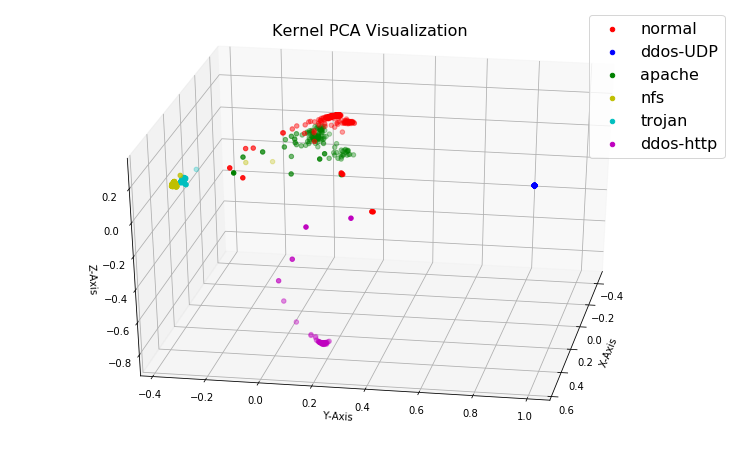

In [25]:
# Generate a figure 
fig = plt.figure(figsize=(13,8))
ax = plt.axes(projection='3d')
plt.title("Kernel PCA Visualization", fontsize=16)

# List of colors
colors = ['r', 'b', 'g', 'y', 'c', 'm', 'k', 'brown']

# Plotting data points in the 3D plot with labels.
idx = 0
label_idx = 0

for label in data_labels:
    ax.scatter3D(xs=train_x_pca[idx : idx + train_size[label], 0], \
                ys=train_x_pca[idx : idx + train_size[label], 1], \
                zs=train_x_pca[idx : idx + train_size[label], 2], \
                c = colors[label_idx], \
                label = label)
    idx = idx + train_size[label]
    label_idx = label_idx + 1

# Generate labels.
ax.set_xlabel('X-Axis')
ax.set_ylabel('Y-Axis')
ax.set_zlabel('Z-Axis')

# Generate the legend.
plt.legend(prop={'size': 16})

# Adjust the 3D view.
ax.azim = 10
ax.elev = 30

# Show the plot
plt.show()

### 3.4 - 2D Visualization

**Task 4: In this task, you will visualize the data in 2D. More specifically, you will**
* First apply kernel PCA with `n_components=2`, `kernel="rbf"`, `fit_inverse_transform=True`, and `gamma=10`. 
* Then visualize the data on a 2D figure using the `plt.scatter()` function.

In [26]:
train_x_pca_2d = None

#################################################################
##### Start code here #####
transformer = KernelPCA(n_components=2, kernel="rbf", fit_inverse_transform=True, gamma=10)
train_x_pca_2d = transformer.fit_transform(train_x_copy)
##### End code here #####
#################################################################

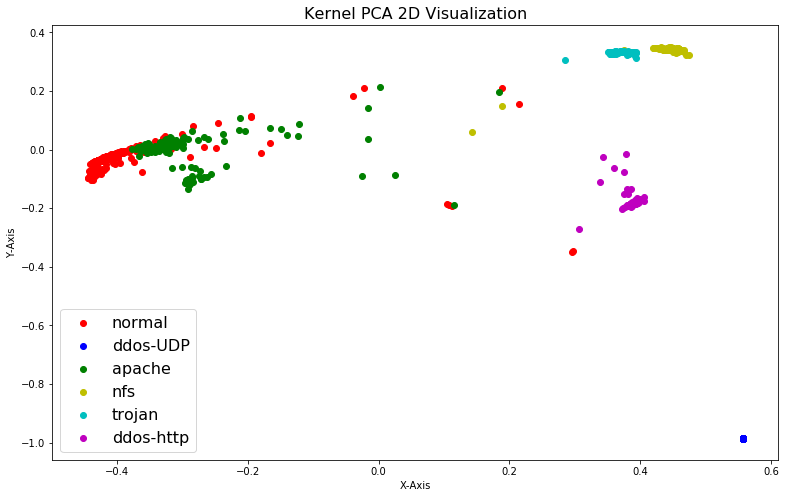

In [28]:
# Generate a figure 
fig = plt.figure(figsize=(13,8))
plt.title("Kernel PCA 2D Visualization", fontsize=16)

# List of colors
colors = ['r', 'b', 'g', 'y', 'c', 'm', 'k', 'brown']

# Plotting data points in the 2D plot with labels.
#################################################################
##### Start code here #####
idx = 0
label_idx = 0

for label in data_labels:
    plt.scatter(train_x_pca_2d[idx : idx + train_size[label], 0], \
                train_x_pca_2d[idx : idx + train_size[label], 1], \
                c = colors[label_idx], \
                label = label)
    idx = idx + train_size[label]
    label_idx = label_idx + 1

##### End code here #####
#################################################################
    
# Generate labels.
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')

# Generate the legend.
plt.legend(prop={'size': 16})

# Show the plot
plt.show()

**Task 5: Based on the 2D and 3D plots, answer the following questions.**
- Comparison between the attack data against the normal data:
    - What attacks are significantly different from the normal data?
    - Which attack is the closest to the normal data?
- Comparison among different attacks:
    - Which attacks are very similar to each other?
    - Which attacks are very different from others?

## 4 - Supervised Learning - *k*-Nearest Neighbor

In this section, we will apply a popular unsupervised ML technique called ***k*-Nearest Neighbor**(*k*-means clustering) ([Wikipedia](https://en.wikipedia.org/wiki/K-nearest_neighbor_algorithm)) to the projected 2D data points and visualize the clustering result.


### 4.1 - Import Packages and Train *k*-NN Classifier

First of all, we will import the needed packages and run `KNeighborsClassifier` provided by `sklearn`.

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

n_neighbors = 15  # It is the `k` value
weights = 'uniform'

knn_clf = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)
knn_clf.fit(train_x_pca_2d, train_y.ravel()) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform')

### 4.2 - Evaluate the *k*-NN Classifier on Testing Set

**Task 6: Evaluate the kNN classifer on the testing set and print the classification accuracy.**

Next, we can use the trained classifier to make predictions on the testing data. 

In [30]:
# We need to also project the testing data onto the same 2D plane. 
test_x_pca_2d = transformer.transform(copy.deepcopy(test_x))

#################################################################
##### Start code here #####
print(knn_clf.predict(test_x_pca_2d))
print("The classification accuracy is %.2f" %(knn_clf.score(test_x_pca_2d, test_y)*100) +"%")
##### End code here #####
#################################################################


[5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 3. 0. 3. 0. 0.
 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 0.
 0. 3. 3. 3. 3. 0. 3. 0. 3. 3. 3. 0. 3. 3. 3. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
The classification accuracy is 94.62%


### 4.3 - Visualization of *k*-NN Decision Boundaries

Now, we are going to plot kNN decision boundaries, training data points, and testing data points on the same figure. 

**Task 7: Plot the decision bounaries of the above kNN classifier.**
- Set the resolution to `h=0.05`
- Use the color map `cmap=cmap_custom` and set transparency `alpha=0.05`
- Useful reference: https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html

<Figure size 936x576 with 0 Axes>

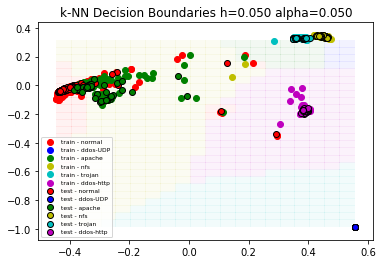

In [34]:
plt.figure(figsize=(13,8))

cmap_custom = ListedColormap(['r', 'b', 'g', 'y', 'c', 'm'])

########### Plot decision bounaries ###########
#################################################################
##### Start code here #####
h= 0.05
alp =0.05

train_x_min, train_x_max = train_x_pca_2d[:, 0].min(), train_x_pca_2d[:, 0].max()
train_y_min, train_y_max = train_x_pca_2d[:, 1].min(), train_x_pca_2d[:, 1].max()
xx, yy = np.meshgrid(np.arange(train_x_min, train_x_max, h),
                         np.arange(train_y_min, train_y_max, h))
z = knn_clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
# Put the result into a color plot
z = z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, z, cmap=cmap_custom, alpha=alp)
plt.title("k-NN Decision Boundaries h=%.3f" %h + " "+ "alpha=%.3f" %alp)
##### End code here #####
#################################################################

########### Plot training data points ###########
idx = 0
label_idx = 0
for label in data_labels:
    plt.scatter(train_x_pca_2d[idx : idx + train_size[label], 0], \
                train_x_pca_2d[idx : idx + train_size[label], 1], \
                c = colors[label_idx], \
                label = 'train - ' + label)
    idx = idx + train_size[label]
    label_idx = label_idx + 1

########### Plot testing data points ###########
idx = 0
label_idx = 0
for label in data_labels:
    plt.scatter(test_x_pca_2d[idx : idx + test_size[label], 0], \
                test_x_pca_2d[idx : idx + test_size[label], 1], \
                c = colors[label_idx], \
                label = 'test - ' + label, edgecolor='k')
    idx = idx + test_size[label]
    label_idx = label_idx + 1
    
plt.legend(loc=3, fontsize=6)
plt.show()

## 5 - Deep Neural Network

Next, we will use Deep Neural Network (DNN) to classify attacks. 

### 5.1 - Import Packages

In [35]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

Using TensorFlow backend.


### 5.2 - Convert Y labels to one-hot matrix

When modeling multi-class classification problems using neural networks, it is good practice to reshape the output attribute from a vector that contains values for each class value to be a matrix with a boolean for each class value and whether or not a given instance has that class value or not.

This is called **one hot encoding** from a categorical variable.

<img src="./one-hot-encoding.png"  style="width: 400px;"/>

In [36]:
train_y_one_hot = np_utils.to_categorical(train_y)
vali_y_one_hot = np_utils.to_categorical(vali_y)
test_y_one_hot = np_utils.to_categorical(test_y)

In [37]:
example_idx = 10
print('The old class is {}, and the new class is {}'.format(train_y[example_idx], train_y_one_hot[example_idx,:]))

example_idx = 300
print('The old class is {}, and the new class is {}'.format(train_y[example_idx], train_y_one_hot[example_idx,:]))

The old class is [0.], and the new class is [1. 0. 0. 0. 0. 0.]
The old class is [4.], and the new class is [0. 0. 0. 0. 1. 0.]


### 5.3 - Background on DNN

We now discuss a couple of things you may need to know in order to implement a DNN using Keras.
- A DNN usually consists of 1) **Input Layer**, 2) *L* **Hidden Layers** (L=3 in this example shown below), and 3) **Output Layer**.
- Each layer consists of a certain number of **neurons**.
    - In this example, the input layer has 4 neurons.
    - Each hidden layer has 6 neurons.
    - The output layer has 4 neurons.
- In particular, this example is a **fully connected** DNN, that is, each neuron in the previous layer is connected to each neuron in the next layer.
- Each neuro performs the following operation: it computes the weighted sums of its inputs, adds a bias, and decides whether it should be "fired"or not.
    - The behavior of "firing" is captured by the **activation function** ([Wikipedia](https://en.wikipedia.org/wiki/Activation_function)). 
    - Common activation functions include linear, sigmoid, ReLU, and softmax. 
    - More references: https://medium.com/the-theory-of-everything/understanding-activation-functions-in-neural-networks-9491262884e0

<img src="./neural_network.png"  style="width: 600px;"/>

- In addition, during training, we will update the model every several samples (i.e., batch) and pass the entire training set into the model multiple times (i.e., epochs).
    - **Batch size**: Total number of training examples present in a single batch.
    - **Epochs**: One Epoch is when an ENTIRE dataset is passed forward and backward through the neural network only ONCE.

(Reference: https://towardsdatascience.com/epoch-vs-iterations-vs-batch-size-4dfb9c7ce9c9)

### 5.4 - Task 8: Implement a DNN using Keras

In this task, you will implement a 2-layer DNN using keras, based on whatever online resources you can find. A list of useful tutorials are provided as below:
- https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/
- https://www.tensorflow.org/tutorials/keras/basic_classification


**Task 8.1: Create a DNN model.**

Specifications:
- The DNN model (created using `Sequential()`) consists of 3 fully connected layers (using `Dense()`), in additiion to the input layer:
    - The Input Layer consists of `num_features` neurons.
    - The 1st Hidden Layer consists of `64` neurons, using `relu` as the activation function.
    - The 2nd Hidden Layer consists of `16` neurons, using `relu` as the activation function.
    - The Output Layer consists of `num_classes` neurons, using `softmax` as the activation function.
- Use `compile()` to compile the model.
- Use `'categorical_crossentropy'` as the loss function, use `'adam'` as the optimizer, and use `['accuracy']` as the metrics.

In [38]:
num_features = train_x.shape[1]
num_classes = train_y_one_hot.shape[1]

model = None
#################################################################
##### Start code here #####
np.random.seed(5)
dnn = Sequential()
dnn.add(Dense(64, input_dim=num_features, activation='relu'))
dnn.add(Dense(16, activation='relu'))
dnn.add(Dense(num_classes, activation='softmax'))
dnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
##### End code here
#################################################################

**Task 8.2: Train the DNN model.**

Speficiations:
- You will need to call `model.fit()` of the created DNN model with proper arguments.
- Train on `train_x` and `train_y_one_hot`
- Use `(vali_x, vali_y_one_hot)` as the `validation_data`
- Use `epochs=30` and `batch_size=10`.
- Save the output of `model.fit()` as `history`

In [39]:
history = None

#################################################################
##### Start code here #####
history = dnn.fit(train_x, train_y_one_hot, validation_data=(vali_x, vali_y_one_hot),epochs=30, batch_size=10)

##### End code here #####
#################################################################

Train on 780 samples, validate on 260 samples
Epoch 1/30
780/780 [==============================] - 3s 4ms/step - loss: 1.6763 - acc: 0.7372 - val_loss: 1.4626 - val_acc: 0.7885

**Task 8.3: Plot both training and validation accuracies.**

Hints: 
- To retrieve the training and validation accuracies for different epochs, use `history.history['acc']` and `history.history['val_acc']`
- You will need to call `plt.plot()` for plotting.
- You may need to call `plt.title()`, `plt.xlabel()`, `plt.ylabel()`, and `plt.legend()` to provide necessary information on the plot.


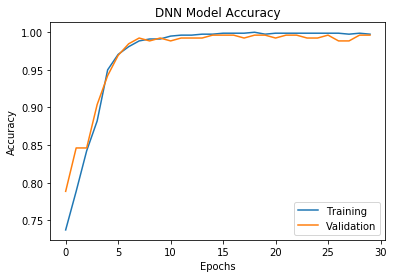

In [41]:
training_acc = history.history['acc']
validation_acc = history.history['val_acc']

#################################################################
##### Start code here #####
plt.plot(training_acc, label="Training")
plt.plot(validation_acc, label="Validation")
plt.title("DNN Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
##### End code here #####
#################################################################

**Task 8.4: Evaluate the model on the testing set and print the testing accuracy.**

- Hint: You will need to call `model.evaluate()` 

In [42]:
#################################################################
##### Start code here #####
test_results = dnn.evaluate(test_x, test_y_one_hot)
print("The testing accuracy is %.3f" %(test_results[1]*100) +"%")
##### End code here #####
#################################################################

260/260 [==============================] - 0s 511us/step
The testing accuracy is 99.615%


## 6 - Task 9: Additional Questions

1. For the kNN classifier, there are several design parameters such as `n_neighbors` and `weights` that we can choose. Please describe how to leverage the validation set to choose the best design parameters. 
1. For DNN, what is the difference between different activation functions, specifically, linear, sigmoid, ReLU, vs. softmax ?
1. In ML, What is overfitting and underfitting?